# Final Project Submission

Please fill out:
* Student name: Karl Van Burkleo
* Student pace: Part-time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://audioelevators.github.io/a_look_into_predictive_models


### Aliasing the software 

In [718]:
import numpy as np
import pandas as pd
import statsmodels as sm
from statsmodels.api import formula


import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### Importing the Dataset


In [719]:
df = pd.read_csv("kc_house_data.csv")

### Just a quick look at what data I'm going to be working with

In [720]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [721]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# 5 Point Statistics

In [722]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# NAN and Missing Data check

In [723]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### These are columns that have missing data or NAN

In [724]:
display(df['waterfront'].unique())
display(df['view'].unique())
display(df['sqft_basement'].unique())
display(df['yr_renovated'].unique())

array([nan,  0.,  1.])

array([ 0., nan,  3.,  4.,  2.,  1.])

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

## Let's deal with the missing data

In [725]:
# Replacing NAN of 'Waterfront' column with median of that column
df['waterfront'].fillna(df['waterfront'].median(), inplace=True)

display(df['waterfront'].unique())

array([0., 1.])

In [726]:
# Dropping NAN in 'view' column
df.dropna(subset=['view'],inplace=True)

In [727]:
#replacing the NAN in 'yr_renovated' with 0. Im assuming that a NAN house has not been renovated
df['yr_renovated'].fillna(df['yr_renovated'].min(), inplace=True)


In [728]:
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()
# no duplicates, thats good!

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [729]:
# Checking for extraneous values
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')
    
   

id 
 795000620     0.000139
5430300171    0.000093
5083000375    0.000093
3395040550    0.000093
5101405604    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006594
6/26/2014    0.006083
6/25/2014    0.006083
7/8/2014     0.005898
4/27/2015    0.005758
Name: date, dtype: float64 


price 
 450000.0    0.007941
350000.0    0.007941
550000.0    0.007384
500000.0    0.007059
425000.0    0.006966
Name: price, dtype: float64 


bedrooms 
 3    0.454676
4    0.318798
2    0.127891
5    0.074115
6    0.012538
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249094
1.00    0.178369
1.75    0.140940
2.25    0.094595
2.00    0.089440
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006408
1400    0.006223
1440    0.006176
1010    0.005991
1800    0.005991
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016578
6000    0.013467
4000    0.011656
7200    0.010216
4800    0.005526
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494242
2.0    0.381304
1.5    

In [730]:
# sqft_basement has '?' I will just replace those rows with centraility because its only 2% 
df['sqft_basement'].replace('?', np.nan, inplace=True)

In [731]:
# turned '?' into NaN and then into median since i didnt want to lose the data of the other columns
df['sqft_basement'].fillna(df['sqft_basement'].median(), inplace=True)

In [732]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### No more missing data! 

## Let's Drop the columns I dont think serve a purpose in the model I will be building

In [733]:
df = df.drop('id', axis = 1)

In [734]:
df = df.drop('date', axis = 1)

In [735]:
df = df.drop('zipcode', axis=1)

In [736]:
df = df.drop('sqft_basement', axis=1) # too many null variables

In [737]:
df.describe() ## nice, the columns above are no longer in the df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,1971.002275,68.866722,47.560180,-122.213948,1986.299944,12751.079502
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,29.376044,364.314552,0.138528,0.140735,685.121001,27255.483308
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## All good to go. Time to start dealing with Categorical Variables

In [738]:
display(df['waterfront'].unique())
display(df['view'].unique())
display(df['grade'].unique())

array([0., 1.])

array([0., 3., 4., 2., 1.])

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

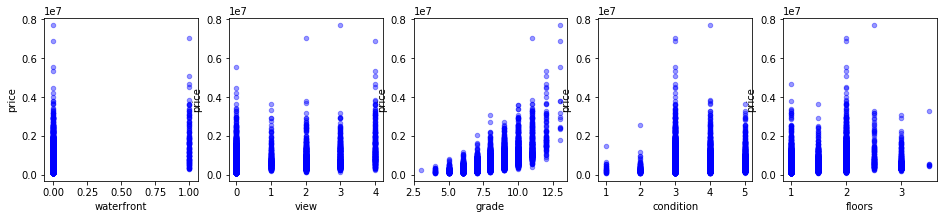

In [739]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip([ 'waterfront', 'view', 'grade', 'condition', 'floors'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')
    
      # This confirms that these are categorical

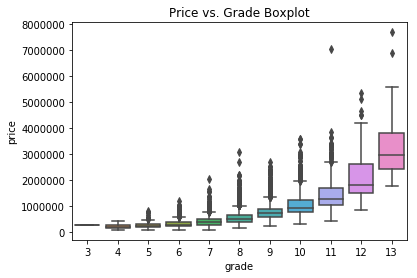

In [741]:
sns.boxplot(x='grade', y='price', data=df).set_title("Price vs. Grade Boxplot");
# an upwards trend with grade and price, i think it will work nicely in the model once transformed

## Let's transform these categorical variables so they can work with my regression

In [649]:
waterfront = ["Yes", "No", "Yes", "No", "Yes", "Yes", "No", "No",]
waterfront_series = pd.Series(waterfront)

In [650]:
cat_waterfront = waterfront_series.astype('category')
cat_waterfront

0    Yes
1     No
2    Yes
3     No
4    Yes
5    Yes
6     No
7     No
dtype: category
Categories (2, object): [No, Yes]

In [651]:
pd.get_dummies(cat_waterfront)

,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,0,1
6,1,0
7,1,0


In [652]:
grade_dummies = pd.get_dummies(df["grade"], prefix="grd", drop_first=True)
condition_dummies = pd.get_dummies(df["condition"], prefix="cond", drop_first=True)


In [653]:
df = df.drop(["grade","condition","view", "waterfront"], axis=1)
# im going to drop view because there is no change in price and value of view

In [654]:
df = pd.concat([df, grade_dummies, condition_dummies], axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'grd_4', 'grd_5', 'grd_6', 'grd_7',
       'grd_8', 'grd_9', 'grd_10', 'grd_11', 'grd_12', 'grd_13', 'cond_2',
       'cond_3', 'cond_4', 'cond_5'],
      dtype='object')

### Great, now we can start visualizing the continuous variables 

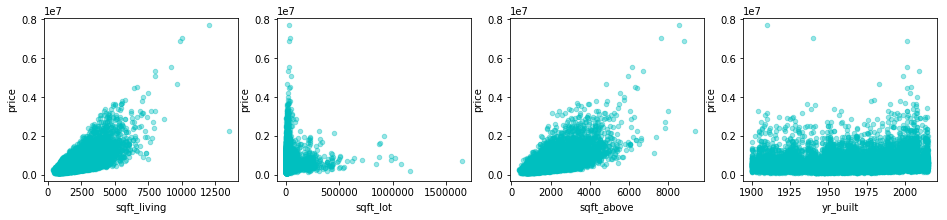

In [655]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='c')

## <font color='red'><p>&#10095; <font color='black'> &#10095; <font color='blue'>Question: Does Year Renovated increase selling price?
<br />
    <br />

    

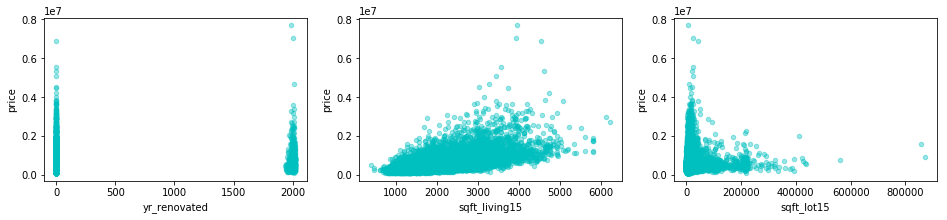

In [747]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['yr_renovated', 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='c')
    
    # slight upwards trend with sqft_living15
    #yr_renovated looks like it could be dropped
    # sqft_lot15 data is too skewed to use in model

### Reference for question 1

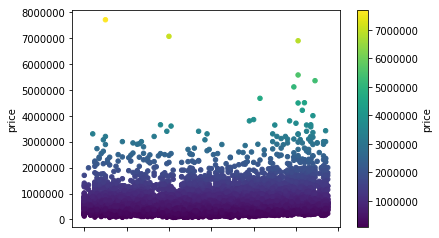

In [757]:
 ax2 = df.plot.scatter(x='yr_built',
...                       y='price',
...                       c='price',
...                       colormap='viridis')

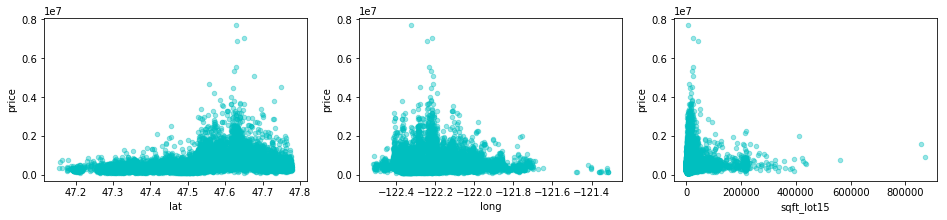

In [657]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['lat', 'long', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='c')

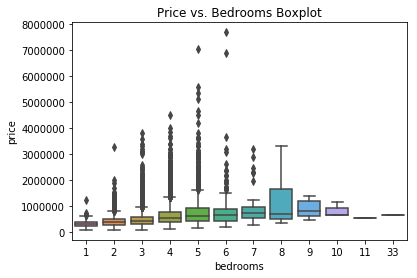

In [742]:
sns.boxplot(x='bedrooms', y='price', data=df).set_title("Price vs. Bedrooms Boxplot");
# this probably will need to be transformed

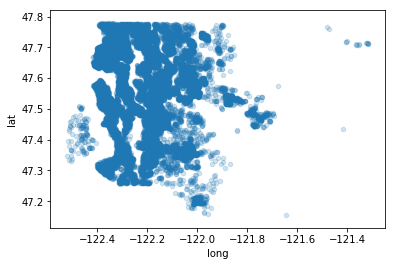

In [659]:
df.plot(kind="scatter", x="long", y="lat", alpha=0.2)
plt.savefig('king_county_map.png')

## <font color='red'><p>&#10095; <font color='black'> &#10095; <font color='blue'>Question: How is the price of a house influenced by its location?
 <br />
    <br />


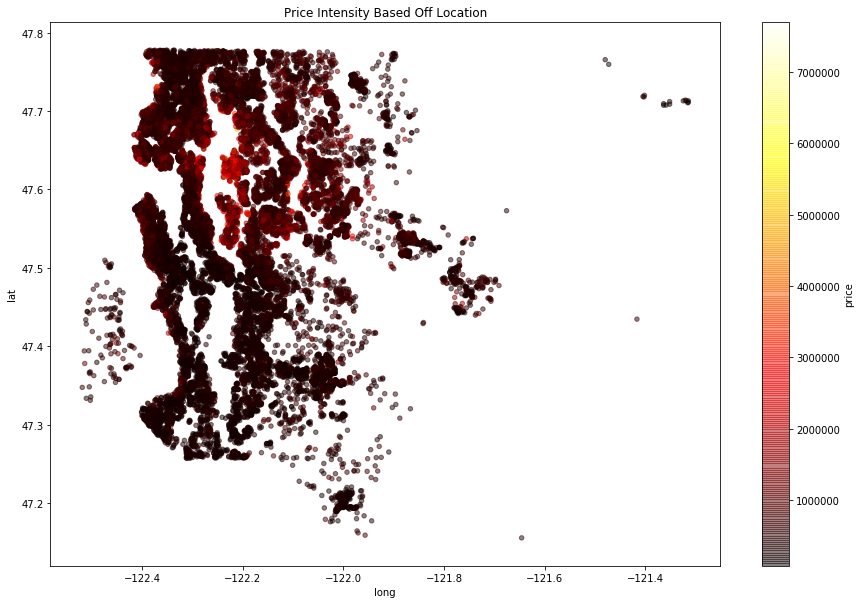

In [743]:
df.plot(kind="scatter", x="long", y="lat", alpha=.5, figsize=(15,10),
    c="price", cmap=plt.get_cmap("hot"), colorbar=True,
    sharex=False).set_title("Price Intensity Based Off Location")
plt.savefig('king_county_price_latlong.png')
#showing a nice view on price based off area

In [661]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)
# looking at how much each independent variable correlates with the dependant price variable.

price            1.000000
sqft_living      0.701587
sqft_above       0.605695
sqft_living15    0.585304
bathrooms        0.525053
grd_11           0.358257
grd_10           0.342118
bedrooms         0.308063
lat              0.307868
grd_12           0.284765
floors           0.257052
grd_9            0.237301
grd_13           0.212890
yr_renovated     0.117982
sqft_lot         0.090338
sqft_lot15       0.083189
cond_5           0.057674
yr_built         0.054273
long             0.022417
cond_3           0.008061
grd_8            0.005135
grd_4           -0.031754
cond_4          -0.032003
cond_2          -0.051633
grd_5           -0.084908
grd_6           -0.209960
grd_7           -0.316713
Name: price, dtype: float64

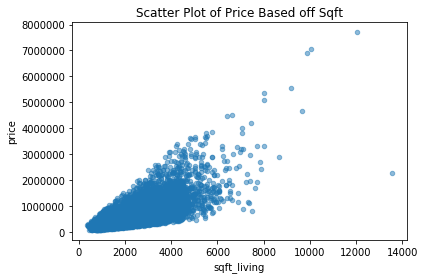

In [744]:
df.plot(kind="scatter", x="sqft_living", y="price", alpha=0.5).set_title("Scatter Plot of Price Based off Sqft")
plt.savefig('scatter.png')

# nice looking upward trend and the points arent spread apart which is a good sign

# Looking for Multicollinearity

In [663]:
# going to look for multicollinearity
df_pred= df.iloc[:,:]
df_pred.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,lat,...,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,cond_2,cond_3,cond_4,cond_5
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,47.5112,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,47.7210,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,770,1933,0.0,47.7379,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,47.5208,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,47.6168,...,1,0,0,0,0,0,0,1,0,0


In [664]:
df_pred.corr()

# noticed a linear trend with bathrooms and sqft_living

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,lat,...,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,cond_2,cond_3,cond_4,cond_5
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.605695,0.054273,0.117982,0.307868,...,0.005135,0.237301,0.342118,0.358257,0.284765,0.212890,-0.051633,0.008061,-0.032003,0.057674
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,0.479148,0.155462,0.017797,-0.010415,...,0.073933,0.160453,0.135214,0.116228,0.060640,0.039083,-0.049515,0.005416,-0.010055,0.027527
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.686173,0.507565,0.046955,0.024487,...,0.190233,0.265268,0.272114,0.246948,0.157282,0.095308,-0.076069,0.191120,-0.166953,-0.034952
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.876553,0.318217,0.050871,0.052383,...,0.071735,0.319073,0.369111,0.345638,0.235825,0.144752,-0.064077,0.102476,-0.084095,-0.018557
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.184325,0.052646,0.005091,-0.085143,...,-0.024492,0.050099,0.074754,0.077607,0.062030,0.007789,0.037976,-0.012177,0.013783,-0.014277
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.523367,0.489410,0.003317,0.049419,...,0.201339,0.244019,0.173862,0.118844,0.053964,0.021282,-0.055410,0.317854,-0.257691,-0.120704
sqft_above,0.605695,0.479148,0.686173,0.876553,0.184325,0.523367,1.000000,0.423999,0.020216,-0.000889,...,0.059554,0.343668,0.376486,0.342460,0.220941,0.126855,-0.057780,0.194254,-0.142502,-0.088592
yr_built,0.054273,0.155462,0.507565,0.318217,0.052646,0.489410,0.423999,1.000000,-0.202467,-0.147850,...,0.200082,0.219635,0.149338,0.099409,0.046705,0.004696,-0.067082,0.391368,-0.257074,-0.244319
yr_renovated,0.117982,0.017797,0.046955,0.050871,0.005091,0.003317,0.020216,-0.202467,1.000000,0.027792,...,0.006524,0.016739,0.001291,-0.001318,-0.000152,0.016055,-0.008330,0.064260,-0.051933,-0.026245
lat,0.307868,-0.010415,0.024487,0.052383,-0.085143,0.049419,-0.000889,-0.147850,0.027792,1.000000,...,0.026257,0.042112,0.052605,0.039366,0.017014,0.013148,-0.022675,0.042860,-0.057864,0.025380


In [579]:
abs(df_pred.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,lat,...,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,cond_2,cond_3,cond_4,cond_5
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Heavy correlation with 
* price/sqft_living
* price/sqft_living15
* bathrooms/sqft_living

## <font color='red'><p>&#10095; <font color='black'> &#10095; <font color='blue'>Question: What room of a house bares the most weight in price?
 <br />
    <br />

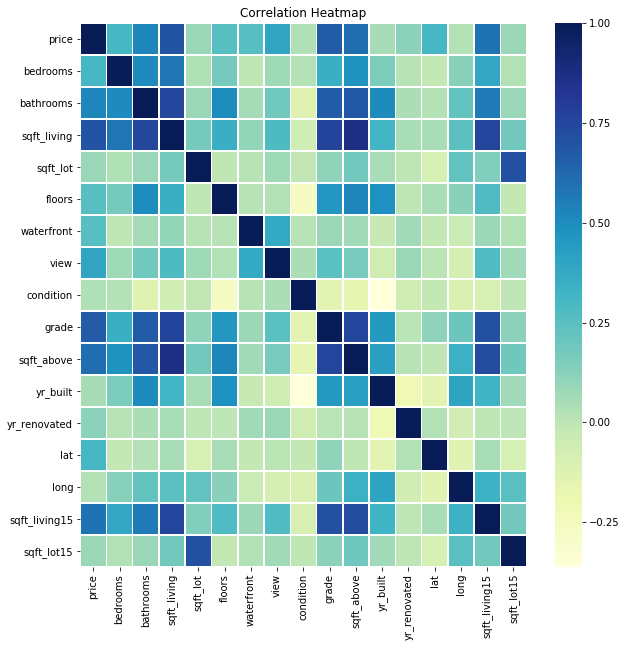

In [745]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), linewidths=.5, ax=ax, cmap="YlGnBu").set_title("Correlation Heatmap")
plt.savefig('Heatmap.png')

## Min Max and Log Transformations

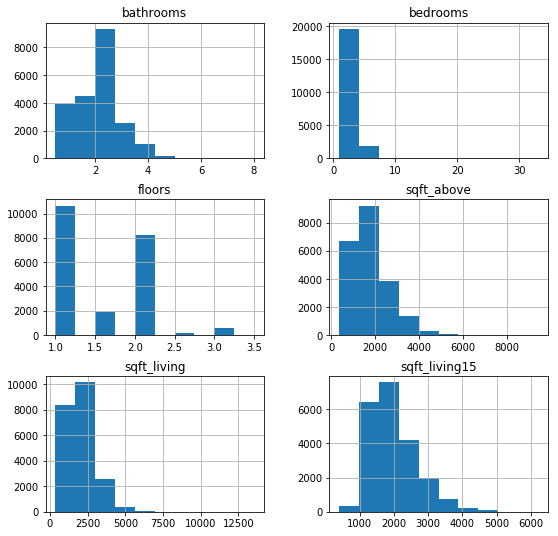

In [666]:
# Lets look at the continuous variables to see what transformations should be done

df[["sqft_living", "sqft_living15", "sqft_above", "floors", "bedrooms", "bathrooms"]].hist(figsize  = [9, 9]);

### Lets log some of these columns so they fit better in my model

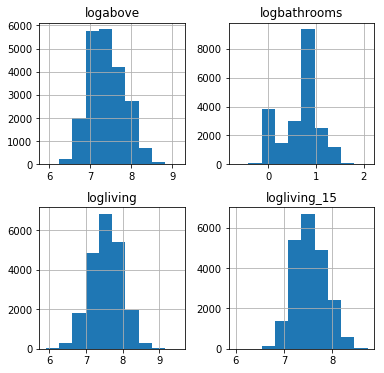

In [667]:

data_log = pd.DataFrame([])
data_log["logbathrooms"] = np.log(df["bathrooms"])
data_log["logliving"] = np.log(df["sqft_living"])
data_log["logliving_15"] = np.log(df["sqft_living15"])
data_log["logabove"] = np.log(df["sqft_above"])
data_log.hist(figsize  = [6, 6]);

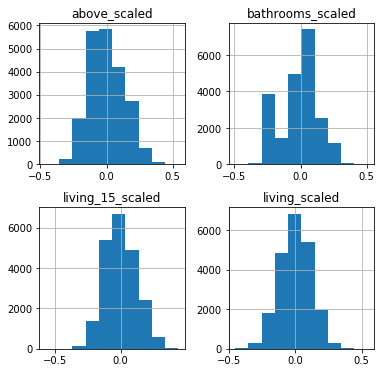

In [668]:

logbathrooms = data_log["logbathrooms"]
logliving = data_log["logliving"]
logliving_15 = data_log["logliving_15"]
logabove = data_log["logabove"]

scaled_bathroooms = (logbathrooms-np.mean(logbathrooms))/(max(logbathrooms)-min(logbathrooms))
scaled_living = (logliving-np.mean(logliving))/(max(logliving)-min(logliving))
scaled_living_15 = (logliving_15-np.mean(logliving_15))/(max(logliving_15)-min(logliving_15))
scaled_above = (logabove-np.mean(logabove))/(max(logabove)-min(logabove))

data_scale = pd.DataFrame([])
data_scale["bathrooms_scaled"]= scaled_bathroooms
data_scale["living_scaled"]= scaled_living
data_scale["living_15_scaled"] = scaled_living_15
data_scale["above_scaled"] = scaled_above

data_scale.hist(figsize  = [6, 6]);


### Much Better

# OLS Time!

In [669]:
price = df['price']
df_fin = pd.concat([data_scale], axis=1)

In [670]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [671]:
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     1860.
Date:                Sun, 25 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:16:26   Log-Likelihood:            -2.9373e+05
No. Observations:               21534   AIC:                         5.875e+05
Df Residuals:                   21507   BIC:                         5.877e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.039e+07   1.61e+06    -25.023      0.000   -4.36e+07   -3.72e+07
bedrooms      -2.731e+04   1952.629    -13.986      0.000   -3.11e+04   -2.35e+04
bathrooms      4.591e+04   3319.570     13.829      0.000    3.94e+04    5.24e+04
sqft_living     153.8348      4.402     34.949      0.000     145.207     162.463
sqft_lot          0.1420      0.048      2.932      0.003       0.047       0.237
floors         2.552e+04   3686.399      6.923      0.000    1.83e+04    3.27e+04
sqft_above      -18.5314      4.417     -4.196      0.000     -27.188      -9.875
yr_built      -2198.5702     73.555    -29.890      0.000   -2342.743   -2054.397
yr_renovated     49.0651      4.029     12.179      0.000      41.169      56.962
lat            5.415e+05   1.06e+04     51.135      0.000    5.21e+05    5.62e+05
long           -1.56e+05    1.2e+04    -12.979      0.000    -1.8e+05   -1.32e+05
sqft_living15    48.1921      3.466     13.904      0.000      41.398      54.986
sqft_lot15       -0.3421      0.074     -4.616      0.000      -0.487      -0.197
grd_4         -1.529e+05   2.07e+05     -0.739      0.460   -5.59e+05    2.53e+05
grd_5           -1.6e+05   2.04e+05     -0.785      0.432   -5.59e+05    2.39e+05
grd_6         -1.493e+05   2.03e+05     -0.734      0.463   -5.48e+05    2.49e+05
grd_7         -1.055e+05   2.03e+05     -0.519      0.604   -5.04e+05    2.93e+05
grd_8         -3.939e+04   2.03e+05     -0.194      0.847   -4.38e+05    3.59e+05
grd_9          8.484e+04   2.04e+05      0.417      0.677   -3.14e+05    4.84e+05
grd_10         2.587e+05   2.04e+05      1.270      0.204   -1.41e+05    6.58e+05
grd_11         5.252e+05   2.04e+05      2.575      0.010    1.25e+05    9.25e+05
grd_12          1.01e+06   2.05e+05      4.926      0.000    6.08e+05    1.41e+06
grd_13         2.147e+06   2.12e+05     10.131      0.000    1.73e+06    2.56e+06
cond_2         2.737e+04    4.1e+04      0.668      0.504   -5.29e+04    1.08e+05
cond_3         3.572e+04   3.81e+04      0.937      0.349    -3.9e+04     1.1e+05
cond_4         7.729e+04   3.81e+04      2.027      0.043    2558.507    1.52e+05
cond_5          1.17e+05   3.83e+04      3.052      0.002    4.19e+04    1.92e+05
==============================================================================
Omnibus:                    16344.490   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1018935.943
Skew:                           3.108   Prob(JB):                         0.00
Kurtosis:                      36.121   Cond. No.                     5.89e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+07. T

In [672]:
df = pd.concat([price, df_fin, grade_dummies, condition_dummies], axis= 1)
y = df[["price"]]
X = df.drop(["price"], axis=1)


In [673]:
df.describe()

,price,bathrooms_scaled,living_scaled,living_15_scaled,above_scaled,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,cond_2,cond_3,cond_4,cond_5
count,2.153400e+04,2.153400e+04,2.153400e+04,2.153400e+04,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,-3.350135e-14,2.381369e-14,4.807694e-14,3.157338e-14,0.001254,0.011238,0.094316,0.415529,0.281090,0.120925,0.052475,0.018436,0.004087,0.000604,0.007894,0.649252,0.262701,0.078806
std,3.660596e+05,1.415531e-01,1.178249e-01,1.192938e-01,1.319979e-01,0.035388,0.105415,0.292275,0.492824,0.449542,0.326048,0.222988,0.134525,0.063797,0.024563,0.088502,0.477215,0.440111,0.269441
min,7.800000e+04,-4.943882e-01,-4.547384e-01,-5.648084e-01,-4.578524e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,-4.254942e-02,-7.919288e-02,-8.481143e-02,-9.685230e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,4.809310e-02,1.206234e-03,-7.946970e-03,-1.319025e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.450000e+05,8.609387e-02,8.148348e-02,8.272704e-02,9.444386e-02,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,7.700000e+06,5.056118e-01,5.452616e-01,4.351916e-01,5.421476e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the Model

In [688]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [689]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17227 4307 17227 4307


In [690]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [691]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

## Here are the values for the Mean Squared Error

In [692]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

# the Error seems very high, but the Test value and Train value are very close together, which proves the model is working correctly

Train Mean Squarred Error: price    5.721376e+10
dtype: float64
Test Mean Squared Error: price    5.524216e+10
dtype: float64


In [693]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 57213757451.39529
Test Mean Squarred Error: 55242155372.22481


### These numbers are large. But not too far off from each other.

## Evaluating the effect of train-test split size

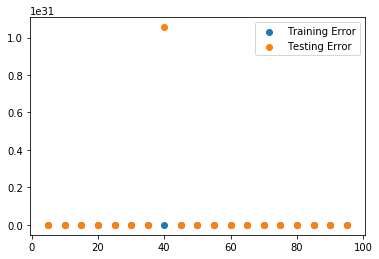

In [714]:

import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

## Stepwise Selections

In [695]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

## This step wise confirms that the right variables are built into the above model

In [696]:
X = df.drop(["price"], axis=1)
y = df[["price"]]

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  grd_10                         with p-value 0.0
Add  grd_7                          with p-value 0.0
Add  living_scaled                  with p-value 0.0
Add  grd_11                         with p-value 0.0
Add  grd_12                         with p-value 0.0
Add  grd_13                         with p-value 0.0
Add  grd_9                          with p-value 1.35316e-168
Add  cond_3                         with p-value 2.1971e-90
Add  grd_8                          with p-value 8.79832e-52
Add  above_scaled                   with p-value 1.64988e-44
Add  cond_5                         with p-value 3.22459e-38
Add  living_15_scaled               with p-value 2.45771e-21
Add  bathrooms_scaled               with p-value 0.000437896
Add  cond_2                         with p-value 0.00646149
resulting features:
['grd_10', 'grd_7', 'living_scaled', 'grd_11', 'grd_12', 'grd_13', 'grd_9', 'cond_3', 'grd_8', 'above_scaled', 'cond_5', 'living_15_scaled', 'bathrooms_scaled', 'cond_2']


In [697]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [698]:
cv_10_results

## note 
## this number kept changing each time I ran the model.  
#Not sure if this is because it is predicted each time or possibly something is wrong with my model

-57457485514.29608

In [709]:
model.predict()

array([250499.16110052, 775067.59671228, 412311.94014922, ...,
       188301.49751193, 347835.8656688 , 190521.02868249])

## Concluding Paragraph

#### <p>&#10095;  Does Year Renovated increase selling price?
After analyzing the scatter plot in Reference 1, the yr_renovated column appears to only affect a minimal amount in price of the house.  Im concluding that this increase in value is not based off the actual year renovated, but a hidden variable.  Possibly location, waterfront or other variables.  Since this is the case, I do not include this in my price prediction model.
<br />
<br />

#### <p>&#10095;  How is the price of a house influenced by its location?
In the "Price Intensity Based Off Location" map I made, it seems that there is a pocket of high price increase in the northern section of King County.  Along with noticing the most expensive houses are next to the water, I also noticed that there was an increase in price inland even though the area matches geographically to the south. This may be due to distance from high priority locations, IE (space needle or tech companies) and if this dataframe is updated it would be an interesting factor to explore.
 
#### <p>&#10095;  What room of a house bares the most weight in price?
Before I answer this question I wanted to point out how interesting it was to see the negative correlation in the heat map match common sense. as the house gets older (yr_built) the condition worsens. This tells me that the data is correctly collected and also solidifies that my heatmap and data cleaning was done correctly. (felt very good)
Onto the question.  Based off the heatmap, the amount bathrooms held more weight than the amount of bedrooms.  I am interested in doing a dataframe with each room "style" of a house included and make an "interested" scatter plot to see what appeals most to the average house shopper. Maybe in the future houses could be based off highly sought after rooms instead of square footage.